In [1]:
import pandas as pd

# Example dataset structure
data = {
    'image_id': ['img_001', 'img_002', 'img_003'],
    'image_path': ['images/img_001.jpg', 'images/img_002.jpg', 'images/img_003.jpg'],
    'species': ['Coccinella septempunctata', 'Harmonia axyridis', 'Adalia bipunctata'],
    'location': ['Cheshire, UK', 'London, UK', 'York, UK'],
    'date': ['2016-05-10', '2015-06-15', '2016-08-02'],
    'verified': [True, False, True]
}

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df.head()

,image_id,image_path,species,location,date,verified
0,img_001,images/img_001.jpg,Coccinella septempunctata,"Cheshire, UK",2016-05-10,True
1,img_002,images/img_002.jpg,Harmonia axyridis,"London, UK",2015-06-15,False
2,img_003,images/img_003.jpg,Adalia bipunctata,"York, UK",2016-08-02,True


In [2]:
# Load multimedia.txt
multimedia_df = pd.read_csv('multimedia.txt', sep='\t')

# Load occurrence.txt
occurrence_df = pd.read_csv('occurrence.txt', sep='\t')


/var/folders/bm/q77j4spj5nsbdchm0916yf5r0000gn/T/ipykernel_38587/653802195.py:5: DtypeWarning: Columns (5,7,9,12,13,15,18,20,21,23,25,28,29,33,38,50,53,58,60,63,69,70,71,76,89,96,111,135,136,139,170,177,178,188) have mixed types. Specify dtype option on import or set low_memory=False.
  occurrence_df = pd.read_csv('occurrence.txt', sep='\t')


In [3]:
multimedia_df.head(2)

,gbifID,type,format,identifier,references,title,description,source,audience,created,creator,contributor,publisher,license,rightsHolder
0,4952929103,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.flickr.com/photos/35142635@N05/499...,NaN,NaN,NaN,NaN,2016-03-29T20:28:25Z,Sandy Rae,NaN,iNaturalist,http://creativecommons.org/licenses/by/4.0/,Sandy Rae
1,4952817808,StillImage,image/jpeg,https://inaturalist-open-data.s3.amazonaws.com...,https://www.inaturalist.org/photos/435812577,NaN,NaN,NaN,NaN,2015-10-02T00:00:00Z,Jean-Louis Metzger,NaN,iNaturalist,http://creativecommons.org/licenses/by-nc/4.0/,Jean-Louis Metzger


In [4]:
occurrence_df.head(2)

,gbifID,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,...,publishedByGbifRegion,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory
0,4953739820,NaN,NaN,NaN,https://creativecommons.org/licenses/by/4.0/le...,NaN,NaN,NaN,Biological Records Centre,NaN,...,EUROPE,GBR,United Kingdom,GBR.1_1,England,GBR.1.63_1,North Yorkshire,GBR.1.63.1_1,Craven,NE
1,4953334491,NaN,NaN,NaN,CC_BY_4_0,2024-10-14T11:15:28Z,NaN,NaN,NaN,Occurrence,...,EUROPE,GBR,United Kingdom,GBR.2_1,Northern Ireland,GBR.2.2_1,"Armagh City, Banbridge and Craig",GBR.2.2.3_1,Craigavon,NE


In [5]:
image_multimedia_df = multimedia_df[multimedia_df['type'] == 'StillImage'][['gbifID', 'identifier']]

In [6]:
image_multimedia_df

,gbifID,identifier
0,4952929103,https://inaturalist-open-data.s3.amazonaws.com...
1,4952817808,https://inaturalist-open-data.s3.amazonaws.com...
2,4952256841,https://inaturalist-open-data.s3.amazonaws.com...
3,4952212598,https://inaturalist-open-data.s3.amazonaws.com...
4,4937041536,https://inaturalist-open-data.s3.amazonaws.com...
...,...,...
222,1098897445,https://inaturalist-open-data.s3.amazonaws.com...
223,1098897445,https://inaturalist-open-data.s3.amazonaws.com...
224,1098897445,https://inaturalist-open-data.s3.amazonaws.com...
225,1098897445,https://inaturalist-open-data.s3.amazonaws.com...


In [7]:
# Merge occurrence data with the multimedia data based on gbifID
merged_df = pd.merge(occurrence_df, image_multimedia_df, on='gbifID')

# Show the first few rows of the merged dataset
merged_df.head()

,gbifID,accessRights,bibliographicCitation,language,license,modified,publisher,references,rightsHolder,type,...,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory,identifier
0,4952929103,NaN,NaN,NaN,CC_BY_4_0,2024-10-12T10:36:38Z,NaN,https://www.inaturalist.org/observations/24418...,Sandy Rae,NaN,...,GBR,United Kingdom,GBR.3_1,Scotland,GBR.3.10_1,East Lothian,GBR.3.10.1_1,East Lothian,NE,https://inaturalist-open-data.s3.amazonaws.com...
1,4952817808,NaN,NaN,NaN,CC_BY_4_0,2024-10-02T18:11:45Z,NaN,https://www.inaturalist.org/observations/24432...,Jean-Louis Metzger,NaN,...,GBR,United Kingdom,GBR.1_1,England,GBR.1.69_1,Oxfordshire,GBR.1.69.3_1,South Oxfordshire,NE,https://inaturalist-open-data.s3.amazonaws.com...
2,4952256841,NaN,NaN,NaN,CC_BY_4_0,2024-10-12T10:36:38Z,NaN,https://www.inaturalist.org/observations/24418...,Sandy Rae,NaN,...,GBR,United Kingdom,GBR.3_1,Scotland,GBR.3.10_1,East Lothian,GBR.3.10.1_1,East Lothian,NE,https://inaturalist-open-data.s3.amazonaws.com...
3,4952212598,NaN,NaN,NaN,CC_BY_4_0,2024-10-02T18:11:49Z,NaN,https://www.inaturalist.org/observations/24432...,Jean-Louis Metzger,NaN,...,GBR,United Kingdom,GBR.1_1,England,GBR.1.69_1,Oxfordshire,GBR.1.69.3_1,South Oxfordshire,NE,https://inaturalist-open-data.s3.amazonaws.com...
4,4937041536,NaN,NaN,NaN,CC_BY_NC_4_0,2024-08-29T17:27:30Z,NaN,https://www.inaturalist.org/observations/16211...,Russ Hedley,NaN,...,GBR,United Kingdom,GBR.1_1,England,GBR.1.84_1,Shropshire,GBR.1.84.1_1,Shropshire,NE,https://inaturalist-open-data.s3.amazonaws.com...


In [8]:
merged_df.columns.to_list()

['gbifID',
 'accessRights',
 'bibliographicCitation',
 'language',
 'license',
 'modified',
 'publisher',
 'references',
 'rightsHolder',
 'type',
 'institutionID',
 'collectionID',
 'datasetID',
 'institutionCode',
 'collectionCode',
 'datasetName',
 'ownerInstitutionCode',
 'basisOfRecord',
 'informationWithheld',
 'dataGeneralizations',
 'dynamicProperties',
 'occurrenceID',
 'catalogNumber',
 'recordNumber',
 'recordedBy',
 'recordedByID',
 'individualCount',
 'organismQuantity',
 'organismQuantityType',
 'sex',
 'lifeStage',
 'reproductiveCondition',
 'caste',
 'behavior',
 'vitality',
 'establishmentMeans',
 'degreeOfEstablishment',
 'pathway',
 'georeferenceVerificationStatus',
 'occurrenceStatus',
 'preparations',
 'disposition',
 'associatedOccurrences',
 'associatedReferences',
 'associatedSequences',
 'associatedTaxa',
 'otherCatalogNumbers',
 'occurrenceRemarks',
 'organismID',
 'organismName',
 'organismScope',
 'associatedOrganisms',
 'previousIdentifications',
 'organism

In [9]:
# Select relevant columns
final_df = merged_df[['gbifID', 'scientificName', 'species', 'countryCode', 'eventDate', 'decimalLatitude', 'decimalLongitude', 'identifier']]

# Show the dataset
final_df.head()

,gbifID,scientificName,species,countryCode,eventDate,decimalLatitude,decimalLongitude,identifier
0,4952929103,"Coccinella septempunctata Linnaeus, 1758",Coccinella septempunctata,GB,2016-03-29T13:28:25,55.938434,-2.873432,https://inaturalist-open-data.s3.amazonaws.com...
1,4952817808,"Harmonia axyridis (Pallas, 1773)",Harmonia axyridis,GB,2015-10-02,51.759941,-1.197035,https://inaturalist-open-data.s3.amazonaws.com...
2,4952256841,"Coccinella septempunctata Linnaeus, 1758",Coccinella septempunctata,GB,2016-03-29T13:09:39,55.938434,-2.873432,https://inaturalist-open-data.s3.amazonaws.com...
3,4952212598,"Harmonia axyridis (Pallas, 1773)",Harmonia axyridis,GB,2015-10-02,51.759941,-1.197035,https://inaturalist-open-data.s3.amazonaws.com...
4,4937041536,"Propylea quatuordecimpunctata (Linnaeus, 1758)",Propylaea quatuordecimpunctata,GB,2016-06-05T10:52,52.532469,-2.670344,https://inaturalist-open-data.s3.amazonaws.com...


## View images

In [10]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [11]:
# Function to display image from a URL
def display_image_from_url(image_url):
    # Send a GET request to the URL to fetch the image
    response = requests.get(image_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open the image using PIL and BytesIO
        img = Image.open(BytesIO(response.content))

        # Display the image
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.show()
    else:
        print(f"Failed to retrieve image from {image_url}. Status code: {response.status_code}")


In [12]:
test_images = final_df.iloc[0:3]['identifier'].to_list()

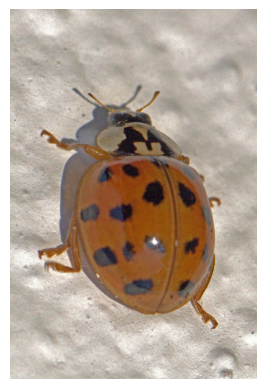

In [13]:
display_image_from_url(test_images[1])

## Columns

In [14]:
occurrence_df.columns.to_list()

['gbifID',
 'accessRights',
 'bibliographicCitation',
 'language',
 'license',
 'modified',
 'publisher',
 'references',
 'rightsHolder',
 'type',
 'institutionID',
 'collectionID',
 'datasetID',
 'institutionCode',
 'collectionCode',
 'datasetName',
 'ownerInstitutionCode',
 'basisOfRecord',
 'informationWithheld',
 'dataGeneralizations',
 'dynamicProperties',
 'occurrenceID',
 'catalogNumber',
 'recordNumber',
 'recordedBy',
 'recordedByID',
 'individualCount',
 'organismQuantity',
 'organismQuantityType',
 'sex',
 'lifeStage',
 'reproductiveCondition',
 'caste',
 'behavior',
 'vitality',
 'establishmentMeans',
 'degreeOfEstablishment',
 'pathway',
 'georeferenceVerificationStatus',
 'occurrenceStatus',
 'preparations',
 'disposition',
 'associatedOccurrences',
 'associatedReferences',
 'associatedSequences',
 'associatedTaxa',
 'otherCatalogNumbers',
 'occurrenceRemarks',
 'organismID',
 'organismName',
 'organismScope',
 'associatedOrganisms',
 'previousIdentifications',
 'organism